# **Introduction to Python II**: Pandas, Matplotlib, Numpy, and Scipy

## Pandas

If you have to deal with spreadsheet-like data, look no further than Pandas (within the Python universe). The closest equivalent outside the Python universe would be R. 

Before we do anything, we should import all the modules that we think we might use. For certain, we should import **pandas, matplotlib, numpy, and scipy**.

In [1]:
import pandas as pd # pd is conventionally used for pandas
import matplotlib.pyplot as plt # Almost all code uses plt for matplotlib.pyplot
import numpy as np # convention
import scipy as sci # ditto

### Familiarize yourself with the data and read it

The data you will work with comes from two sources - an energy bill from Con Edison, and the weather data for the corresponding time from Wunderground. The data from Con Edison that you will work with is 1 year of 15 minute interval data of electricity consumption at my home over the last year. It has approximately $ 24 \times 4 \times 365 = 35040$ lines of data. If you had to open the file in a spreadsheet application, that would defeat the purpose of using a Pythonic tool. In this particular case, it is not so bad - you will not get into much trouble opening 35000 lines in a spreadsheet package, but what if you had a million lines or more? It would be good to use a simpler method of peering into the data.

This is exactly where one of the commands from what you learnt in the section on UNIX becomes useful: **cat**. The name of the file is cned_anndata.csv. At a terminal prompt, let us try the following command: cat cned_anndata.csv|more. You can also try it in your jupyter notebook as shown below.

In [5]:
!cat cned_anndata.csv|more #Your will not be able to run any further cells in this notebook until
# you stop the command with the "Interrupt the Kernel" square button to the top.

﻿Name,ARVIND NARAYANASWAMY
Address,"Should not, beRevealed, Sorry 10027"
Account Number, 83888200299399
Meter Number,6247228123

TYPE,DATE,START TIME,END TIME,USAGE,UNITS,NOTES
Electric usage,2020-05-25,00:00,00:14,0.04,kWh,
Electric usage,2020-05-25,00:15,00:29,0.04,kWh,
Electric usage,2020-05-25,00:30,00:44,0.04,kWh,
Electric usage,2020-05-25,00:45,00:59,0.06,kWh,
Electric usage,2020-05-25,01:00,01:14,0.07,kWh,
Electric usage,2020-05-25,01:15,01:29,0.04,kWh,
Electric usage,2020-05-25,01:30,01:44,0.04,kWh,
Electric usage,2020-05-25,01:45,01:59,0.04,kWh,
Electric usage,2020-05-25,02:00,02:14,0.05,kWh,
Electric usage,2020-05-25,02:15,02:29,0.07,kWh,
Electric usage,2020-05-25,02:30,02:44,0.05,kWh,
Electric usage,2020-05-25,02:45,02:59,0.04,kWh,
Electric usage,2020-05-25,03:00,03:14,0.04,kWh,
Electric usage,2020-05-25,03:15,03:29,0.04,kWh,
Electric usage,2020-05-25,03:30,03:44,0.07,kWh,
Electric usage,2020-05-25,03:45,03:59,0.06,kWh,
Electric usage,2020-05-25,04:00,04:14,0.04,kWh,
m--More

I can also show you my result from a terminal, which I captured as screen grabs. This also gives us a chance to work with images - nice way of sneaking that in!

In [66]:
import matplotlib.image as mpimg #To load images
spreadsheet = mpimg.imread('catConEdSpreadSheet.png')
spreadsheet_Anno = mpimg.imread('catConEdSpreadSheet_Annotated.png')

print(spreadsheet_Anno.shape)

(520, 741, 4)


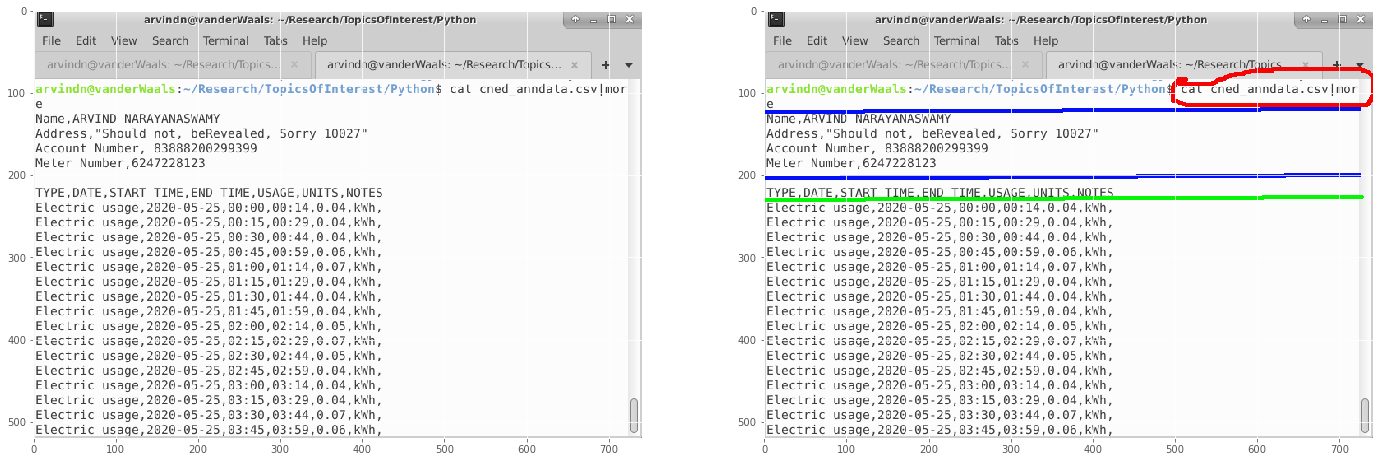

In [67]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(24,8))
ax[0].imshow(spreadsheet)
ax[1].imshow(spreadsheet_Anno)

The data file consists of 5 lines devoted to personal details, which I have suitably altered. Those lines ought to be skipped when you read them into a pandas dataframe. The rest of the data seems to follow the same pattern: each row consists of 7 columns - TYPE, DATE, START TIME, END TIME, UAGE, UNITS, NOTES.

In [3]:
conedData = pd.read_csv('cned_anndata.csv',skiprows=5)
# read_csv is the function in pandas that is used to read a comma separated variable file.

In [4]:
conedData # When you "print" the dataframe, it intelligently prints out only the first 5 
# and the last 5 rows. 

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,NOTES
0,Electric usage,2020-05-25,00:00,00:14,0.04,kWh,NaN
1,Electric usage,2020-05-25,00:15,00:29,0.04,kWh,NaN
2,Electric usage,2020-05-25,00:30,00:44,0.04,kWh,NaN
3,Electric usage,2020-05-25,00:45,00:59,0.06,kWh,NaN
4,Electric usage,2020-05-25,01:00,01:14,0.07,kWh,NaN
...,...,...,...,...,...,...,...
35067,Electric usage,2021-05-25,14:45,14:59,0.05,kWh,NaN
35068,Electric usage,2021-05-25,15:00,15:14,0.08,kWh,NaN
35069,Electric usage,2021-05-25,15:15,15:29,0.05,kWh,NaN
35070,Electric usage,2021-05-25,15:30,15:44,0.04,kWh,NaN


Let us investigate the data types in the data frame. You can do that with **DataFrameName.dtypes**, as shown below.

In [5]:
conedData.dtypes

TYPE           object
DATE           object
START TIME     object
END TIME       object
USAGE         float64
UNITS          object
NOTES          object
dtype: object

Apart from 'USAGE', which is of type float64, all other columns are of data type object.  Generally, object data type is reserved for data types which have numbers and strings. We want to convert that into more usable datatypes, such as float64 or datetime.

The following cell takes the conedData['DATE'] column, converts it to date time, and finally back to a string. I've also added a new column called 'CENTER TIME' that is the mid point between the 'START TIME' and 'END TIME'. In Pandas, you can add a **timedelta** data type to a **datetime** data type.

In [6]:
conedData['CENTER TIME'] = pd.to_datetime(conedData['DATE']+ ' ' + 
                                          conedData['START TIME']) + pd.to_timedelta('00:07:30')
conedData['START TIME'] = pd.to_datetime(conedData['DATE']+ ' ' + conedData['START TIME'])
conedData['END TIME'] = pd.to_datetime(conedData['DATE'] + ' ' + conedData['END TIME'])
conedData['DATE'] = pd.to_datetime(conedData['DATE'])

In [7]:
conedData.dtypes

TYPE                   object
DATE           datetime64[ns]
START TIME     datetime64[ns]
END TIME       datetime64[ns]
USAGE                 float64
UNITS                  object
NOTES                  object
CENTER TIME    datetime64[ns]
dtype: object

In [8]:
conedData

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,NOTES,CENTER TIME
0,Electric usage,2020-05-25,2020-05-25 00:00:00,2020-05-25 00:14:00,0.04,kWh,NaN,2020-05-25 00:07:30
1,Electric usage,2020-05-25,2020-05-25 00:15:00,2020-05-25 00:29:00,0.04,kWh,NaN,2020-05-25 00:22:30
2,Electric usage,2020-05-25,2020-05-25 00:30:00,2020-05-25 00:44:00,0.04,kWh,NaN,2020-05-25 00:37:30
3,Electric usage,2020-05-25,2020-05-25 00:45:00,2020-05-25 00:59:00,0.06,kWh,NaN,2020-05-25 00:52:30
4,Electric usage,2020-05-25,2020-05-25 01:00:00,2020-05-25 01:14:00,0.07,kWh,NaN,2020-05-25 01:07:30
...,...,...,...,...,...,...,...,...
35067,Electric usage,2021-05-25,2021-05-25 14:45:00,2021-05-25 14:59:00,0.05,kWh,NaN,2021-05-25 14:52:30
35068,Electric usage,2021-05-25,2021-05-25 15:00:00,2021-05-25 15:14:00,0.08,kWh,NaN,2021-05-25 15:07:30
35069,Electric usage,2021-05-25,2021-05-25 15:15:00,2021-05-25 15:29:00,0.05,kWh,NaN,2021-05-25 15:22:30
35070,Electric usage,2021-05-25,2021-05-25 15:30:00,2021-05-25 15:44:00,0.04,kWh,NaN,2021-05-25 15:37:30


We'll now load another database - environmental data from Wunderground. This data was collected and stored in a csv file, but as you'll see, the times at which the data are available does not coincide with the times at which the ConEd data are available.

In [9]:
wundergroundData = pd.read_csv('wunderground_2020-05-25_2021-05-25.csv')

The data contain environmental variables measured at a weather station at Central Park, NYC. Unfortunately, the data are not sampled at the same time as the con Edison data. We need to rectify that.

In [10]:
wundergroundData

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,DATE,DateTime
0,00:11:00,14.444444,11.111111,81,NNE,6,0,30.21,0.0,Mostly Cloudy,2020-05-25,2020-05-25 00:11:00
1,00:51:00,14.444444,11.111111,81,NE,7,0,30.20,0.0,Cloudy,2020-05-25,2020-05-25 00:51:00
2,01:51:00,14.444444,11.111111,81,NE,12,0,30.19,0.0,Cloudy,2020-05-25,2020-05-25 01:51:00
3,02:08:00,13.888889,11.666667,87,NE,12,0,30.19,0.0,Light Drizzle,2020-05-25,2020-05-25 02:08:00
4,02:34:00,13.333333,11.666667,90,NE,15,0,30.19,0.0,Light Drizzle,2020-05-25,2020-05-25 02:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10062,19:51:00,18.888889,12.222222,65,S,15,0,30.10,0.0,Mostly Cloudy,2021-05-25,2021-05-25 19:51:00
10063,20:51:00,19.444444,12.777778,66,S,10,0,30.11,0.0,Mostly Cloudy,2021-05-25,2021-05-25 20:51:00
10064,21:51:00,19.444444,13.333333,68,S,10,0,30.11,0.0,Mostly Cloudy,2021-05-25,2021-05-25 21:51:00
10065,22:51:00,18.888889,13.333333,70,S,8,0,30.11,0.0,Mostly Cloudy,2021-05-25,2021-05-25 22:51:00


In [11]:
# find the wundergroundData datatypes for the various columns.
wundergroundData.dtypes

Time            object
Temperature    float64
Dew Point      float64
Humidity        object
Wind            object
Wind Speed      object
Wind Gust       object
Pressure        object
Precip.         object
Condition       object
DATE            object
DateTime        object
dtype: object

As the column names suggest, many of the data types ought to be float and not object. Temperature, Dew Point, Humidity, Wind Speed, Wind Gust, Pressure, and Precip. are all floating point numbers. We can specify that in the read_csv function itself as follows:

In [12]:
wundergroundData = pd.read_csv('wunderground_2020-05-25_2021-05-25.csv',
                              converters = {'Temperature': float, 'Dew Point': float,
                                           'Humidity': float, 'Wind Speed': float,
                                           'Wind Gust': float, 'Pressure': float,
                                           'Precip.': float})

Now, you can see that the column data types have changed for the better.

In [13]:
wundergroundData.dtypes

Time            object
Temperature    float64
Dew Point      float64
Humidity       float64
Wind            object
Wind Speed     float64
Wind Gust      float64
Pressure       float64
Precip.        float64
Condition       object
DATE            object
DateTime        object
dtype: object

Now comes the extension of the dataframe - extension so that the dataframe can include interpolated values of environmental variables at the times corresponding to that in the con Edison database.

First, I am going to create an empty dataframe with the same columns as the wundergroundData. I will call this dataframe wundergroundAppend.

Second, I am going to add the 'CENTER TIME' column from con Edison database to the wundergroundAppend dataframe.

### Appending and merging dataframes

We want to eventually merge the two dataframes, one from Con Edison, and the other from Wunderground. We will do that by extending 'wundergroundData' to include the times at which con Edison published the usage data. Such a dataframe will have plenty of unfilled data, appearing as NaN. We'll sort the dataframe according to the times. Then, we'll interpolate the dataframe so as to fill incomplete or NaN values - linear interpolation is sufficient.

In [14]:
wundergroundAppend  = pd.DataFrame(columns = wundergroundData.columns)

wundergroundAppend['DateTime'] = conedData['CENTER TIME']

You will see below that the column 'DateTime' alone is filled. The rest of the columns all have NaN as entries, standing for 'not a number'. We'll now append this dataframe to the wundergroundData dataframe.

In [15]:
wundergroundAppend

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,DATE,DateTime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:07:30
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:22:30
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:37:30
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:52:30
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 01:07:30
...,...,...,...,...,...,...,...,...,...,...,...,...
35067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 14:52:30
35068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 15:07:30
35069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 15:22:30
35070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 15:37:30


In [16]:
# the flag ignore_index = False or True seems  to produce the same final result.
wundergroundData = wundergroundData.append(wundergroundAppend, ignore_index=False)

In [17]:
wundergroundData

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,DATE,DateTime
0,00:11:00,14.444444,11.111111,81.0,NNE,6.0,0.0,30.21,0.0,Mostly Cloudy,2020-05-25,2020-05-25 00:11:00
1,00:51:00,14.444444,11.111111,81.0,NE,7.0,0.0,30.20,0.0,Cloudy,2020-05-25,2020-05-25 00:51:00
2,01:51:00,14.444444,11.111111,81.0,NE,12.0,0.0,30.19,0.0,Cloudy,2020-05-25,2020-05-25 01:51:00
3,02:08:00,13.888889,11.666667,87.0,NE,12.0,0.0,30.19,0.0,Light Drizzle,2020-05-25,2020-05-25 02:08:00
4,02:34:00,13.333333,11.666667,90.0,NE,15.0,0.0,30.19,0.0,Light Drizzle,2020-05-25,2020-05-25 02:34:00
...,...,...,...,...,...,...,...,...,...,...,...,...
35067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 14:52:30
35068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 15:07:30
35069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 15:22:30
35070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-25 15:37:30


In [18]:
wundergroundData.dtypes

Time            object
Temperature    float64
Dew Point      float64
Humidity       float64
Wind            object
Wind Speed     float64
Wind Gust      float64
Pressure       float64
Precip.        float64
Condition       object
DATE            object
DateTime        object
dtype: object

In [19]:
# Convert 'DateTime' columm to a datatype of datetime. It is currently of dtype 'object'.
wundergroundData['DateTime'] = pd.to_datetime(wundergroundData['DateTime'])

In [20]:
# Sort the dataframe so that the data are in order of time, from the earliest to the latest.
wundergroundData = wundergroundData.sort_values(by='DateTime')

In [21]:
# Same values as earlier, except they are sorted in order of 'DateTime'
wundergroundData

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,DATE,DateTime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:07:30
0,00:11:00,14.444444,11.111111,81.0,NNE,6.0,0.0,30.21,0.0,Mostly Cloudy,2020-05-25,2020-05-25 00:11:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:22:30
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:37:30
1,00:51:00,14.444444,11.111111,81.0,NE,7.0,0.0,30.20,0.0,Cloudy,2020-05-25,2020-05-25 00:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10062,19:51:00,18.888889,12.222222,65.0,S,15.0,0.0,30.10,0.0,Mostly Cloudy,2021-05-25,2021-05-25 19:51:00
10063,20:51:00,19.444444,12.777778,66.0,S,10.0,0.0,30.11,0.0,Mostly Cloudy,2021-05-25,2021-05-25 20:51:00
10064,21:51:00,19.444444,13.333333,68.0,S,10.0,0.0,30.11,0.0,Mostly Cloudy,2021-05-25,2021-05-25 21:51:00
10065,22:51:00,18.888889,13.333333,70.0,S,8.0,0.0,30.11,0.0,Mostly Cloudy,2021-05-25,2021-05-25 22:51:00


Now comes the cool part of pandas. It gives us the tools to interpolate and fill those entries which are blank (or NaN). One caveat: you can only interpolate those columns whose data types are numeric - float for all practical purposes.

That is what I have done below using wundergroundData.interpolate(method='linear)
Then, I have renamed the column 'DateTime' to 'CENTER TIME'.

In [22]:
wundergroundData = wundergroundData.interpolate(method='linear')

In [23]:
wundergroundData = wundergroundData.rename(columns={'DateTime':'CENTER TIME'})

Because of the way the dataframes have been merged, there are some unnnecesary columns like 'Unnamed:0'. We'll eliminate them eventually. You will notice that columns like 'Wind', which gives the wind direction, or 'Time', which is datetime or object, have not been interpolated because they are not numeric.

In [24]:
wundergroundData

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,DATE,CENTER TIME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-25 00:07:30
0,00:11:00,14.444444,11.111111,81.0,NNE,6.000000,0.0,30.210000,0.0,Mostly Cloudy,2020-05-25,2020-05-25 00:11:00
1,NaN,14.444444,11.111111,81.0,NaN,6.333333,0.0,30.206667,0.0,NaN,NaN,2020-05-25 00:22:30
2,NaN,14.444444,11.111111,81.0,NaN,6.666667,0.0,30.203333,0.0,NaN,NaN,2020-05-25 00:37:30
1,00:51:00,14.444444,11.111111,81.0,NE,7.000000,0.0,30.200000,0.0,Cloudy,2020-05-25,2020-05-25 00:51:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10062,19:51:00,18.888889,12.222222,65.0,S,15.000000,0.0,30.100000,0.0,Mostly Cloudy,2021-05-25,2021-05-25 19:51:00
10063,20:51:00,19.444444,12.777778,66.0,S,10.000000,0.0,30.110000,0.0,Mostly Cloudy,2021-05-25,2021-05-25 20:51:00
10064,21:51:00,19.444444,13.333333,68.0,S,10.000000,0.0,30.110000,0.0,Mostly Cloudy,2021-05-25,2021-05-25 21:51:00
10065,22:51:00,18.888889,13.333333,70.0,S,8.000000,0.0,30.110000,0.0,Mostly Cloudy,2021-05-25,2021-05-25 22:51:00


In [25]:
wundergroundData.dtypes

Time                   object
Temperature           float64
Dew Point             float64
Humidity              float64
Wind                   object
Wind Speed            float64
Wind Gust             float64
Pressure              float64
Precip.               float64
Condition              object
DATE                   object
CENTER TIME    datetime64[ns]
dtype: object

In [270]:
#wundergroundData['CENTER TIME'] = pd.to_datetime(wundergroundData['CENTER TIME'])

**Merging two dataframes** Here is how you merge the two dataframes based on the 'CENTER TIME'.

In [26]:
combinedData = pd.merge(conedData, wundergroundData, how='inner', on=['CENTER TIME'])

In [27]:
combinedData.columns #Again, we have many unnecessary columns. We'll eliminate them.

Index(['TYPE', 'DATE_x', 'START TIME', 'END TIME', 'USAGE', 'UNITS', 'NOTES',
       'CENTER TIME', 'Time', 'Temperature', 'Dew Point', 'Humidity', 'Wind',
       'Wind Speed', 'Wind Gust', 'Pressure', 'Precip.', 'Condition',
       'DATE_y'],
      dtype='object')

In [28]:
# We pick only those columns which make sense to us.
combinedData = combinedData[['TYPE', 'CENTER TIME', 'START TIME', 'END TIME', 'USAGE', 
                             'UNITS', 'NOTES', 'Temperature', 'Dew Point','Humidity', 'Wind', 
                             'Wind Speed', 'Wind Gust', 'Pressure', 'Precip.','Condition']]

In [29]:
combinedData.dtypes

TYPE                   object
CENTER TIME    datetime64[ns]
START TIME     datetime64[ns]
END TIME       datetime64[ns]
USAGE                 float64
UNITS                  object
NOTES                  object
Temperature           float64
Dew Point             float64
Humidity              float64
Wind                   object
Wind Speed            float64
Wind Gust             float64
Pressure              float64
Precip.               float64
Condition              object
dtype: object

### Plotting via pandas

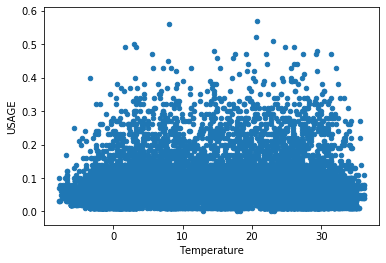

In [30]:
combinedData.plot.scatter(x='Temperature', y='USAGE')

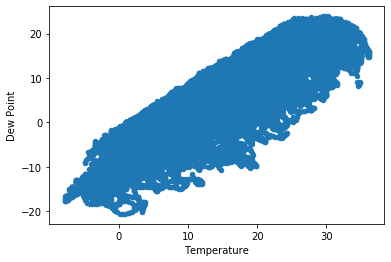

In [31]:
combinedData.plot.scatter(x='Temperature', y='Dew Point')

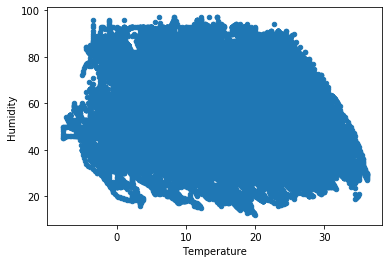

In [32]:
wundergroundData.plot.scatter(x='Temperature', y='Humidity')

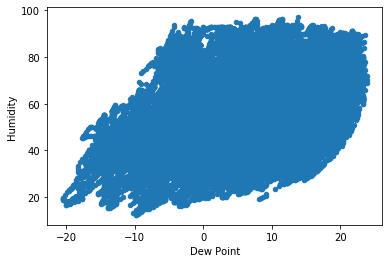

In [33]:
combinedData.plot.scatter(x='Dew Point', y='Humidity')

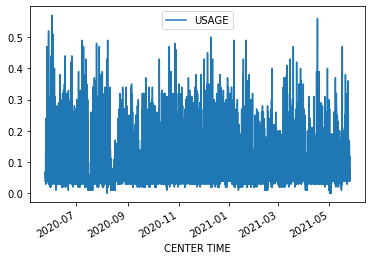

In [34]:
combinedData.plot(x='CENTER TIME', y='USAGE')

In [35]:
combinedData

,TYPE,CENTER TIME,START TIME,END TIME,USAGE,UNITS,NOTES,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,Electric usage,2020-05-25 00:07:30,2020-05-25 00:00:00,2020-05-25 00:14:00,0.04,kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric usage,2020-05-25 00:22:30,2020-05-25 00:15:00,2020-05-25 00:29:00,0.04,kWh,NaN,14.444444,11.111111,81.0,NaN,6.333333,0.0,30.206667,0.0,NaN
2,Electric usage,2020-05-25 00:37:30,2020-05-25 00:30:00,2020-05-25 00:44:00,0.04,kWh,NaN,14.444444,11.111111,81.0,NaN,6.666667,0.0,30.203333,0.0,NaN
3,Electric usage,2020-05-25 00:52:30,2020-05-25 00:45:00,2020-05-25 00:59:00,0.06,kWh,NaN,14.444444,11.111111,81.0,NaN,8.000000,0.0,30.198000,0.0,NaN
4,Electric usage,2020-05-25 01:07:30,2020-05-25 01:00:00,2020-05-25 01:14:00,0.07,kWh,NaN,14.444444,11.111111,81.0,NaN,9.000000,0.0,30.196000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,Electric usage,2021-05-25 14:52:30,2021-05-25 14:45:00,2021-05-25 14:59:00,0.05,kWh,NaN,21.666667,10.666667,49.4,NaN,14.000000,18.4,30.164000,0.0,NaN
35076,Electric usage,2021-05-25 15:07:30,2021-05-25 15:00:00,2021-05-25 15:14:00,0.08,kWh,NaN,21.666667,10.777778,49.8,NaN,15.000000,13.8,30.158000,0.0,NaN
35077,Electric usage,2021-05-25 15:22:30,2021-05-25 15:15:00,2021-05-25 15:29:00,0.05,kWh,NaN,21.666667,10.888889,50.2,NaN,16.000000,9.2,30.152000,0.0,NaN
35078,Electric usage,2021-05-25 15:37:30,2021-05-25 15:30:00,2021-05-25 15:44:00,0.04,kWh,NaN,21.666667,11.000000,50.6,NaN,17.000000,4.6,30.146000,0.0,NaN


In [321]:
# Storing combined data to csv file.
combinedData.to_csv('combined_cned_wunderground_data.csv', index=False)

### Selecting part of the data

We started off with the Con Edison data. We only wanted to add the environmental variables corresponding to those times. What we have now is a bigger dataframe. We want to choose only those rows which correspond to the times in con Edison dataframe.

In [36]:
conedDataWithEnvData = combinedData[combinedData['CENTER TIME'].isin(conedData['CENTER TIME'])]
# You'lls see that the number of rows is slightly more than that in conedData. 
# That may be because of duplicates from wundergroundData

conedDataWithEnvData

,TYPE,CENTER TIME,START TIME,END TIME,USAGE,UNITS,NOTES,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,Electric usage,2020-05-25 00:07:30,2020-05-25 00:00:00,2020-05-25 00:14:00,0.04,kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Electric usage,2020-05-25 00:22:30,2020-05-25 00:15:00,2020-05-25 00:29:00,0.04,kWh,NaN,14.444444,11.111111,81.0,NaN,6.333333,0.0,30.206667,0.0,NaN
2,Electric usage,2020-05-25 00:37:30,2020-05-25 00:30:00,2020-05-25 00:44:00,0.04,kWh,NaN,14.444444,11.111111,81.0,NaN,6.666667,0.0,30.203333,0.0,NaN
3,Electric usage,2020-05-25 00:52:30,2020-05-25 00:45:00,2020-05-25 00:59:00,0.06,kWh,NaN,14.444444,11.111111,81.0,NaN,8.000000,0.0,30.198000,0.0,NaN
4,Electric usage,2020-05-25 01:07:30,2020-05-25 01:00:00,2020-05-25 01:14:00,0.07,kWh,NaN,14.444444,11.111111,81.0,NaN,9.000000,0.0,30.196000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35075,Electric usage,2021-05-25 14:52:30,2021-05-25 14:45:00,2021-05-25 14:59:00,0.05,kWh,NaN,21.666667,10.666667,49.4,NaN,14.000000,18.4,30.164000,0.0,NaN
35076,Electric usage,2021-05-25 15:07:30,2021-05-25 15:00:00,2021-05-25 15:14:00,0.08,kWh,NaN,21.666667,10.777778,49.8,NaN,15.000000,13.8,30.158000,0.0,NaN
35077,Electric usage,2021-05-25 15:22:30,2021-05-25 15:15:00,2021-05-25 15:29:00,0.05,kWh,NaN,21.666667,10.888889,50.2,NaN,16.000000,9.2,30.152000,0.0,NaN
35078,Electric usage,2021-05-25 15:37:30,2021-05-25 15:30:00,2021-05-25 15:44:00,0.04,kWh,NaN,21.666667,11.000000,50.6,NaN,17.000000,4.6,30.146000,0.0,NaN


The reason for this discrepancy (35072 rows in conedData dataframe vs 35080 rows in conedDataWithEnvData) is duplicated rows. You can find duplicated rows in a series using seriesname.duplicated. I have shown below that there are 16 duplicated rows in conedDataWithEnvData whereas only 8 in conedData. 35072 - 8 = 35080 - 16. So, all okay.

I checked up the source of the trouble - the data I obtained from con Edison itself contained the error!

In [37]:
dupes_combinedData = combinedData[combinedData['CENTER TIME'].duplicated(keep=False) == True]

print(len(dupes_combinedData))

16


In [38]:
conedData[conedData['CENTER TIME'].duplicated(keep=False) == True]

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,NOTES,CENTER TIME
15348,Electric usage,2020-11-01,2020-11-01 01:00:00,2020-11-01 01:14:00,0.04,kWh,NaN,2020-11-01 01:07:30
15349,Electric usage,2020-11-01,2020-11-01 01:15:00,2020-11-01 01:29:00,0.04,kWh,NaN,2020-11-01 01:22:30
15350,Electric usage,2020-11-01,2020-11-01 01:30:00,2020-11-01 01:44:00,0.06,kWh,NaN,2020-11-01 01:37:30
15351,Electric usage,2020-11-01,2020-11-01 01:45:00,2020-11-01 01:59:00,0.07,kWh,NaN,2020-11-01 01:52:30
15352,Electric usage,2020-11-01,2020-11-01 01:00:00,2020-11-01 01:14:00,0.04,kWh,NaN,2020-11-01 01:07:30
15353,Electric usage,2020-11-01,2020-11-01 01:15:00,2020-11-01 01:29:00,0.04,kWh,NaN,2020-11-01 01:22:30
15354,Electric usage,2020-11-01,2020-11-01 01:30:00,2020-11-01 01:44:00,0.04,kWh,NaN,2020-11-01 01:37:30
15355,Electric usage,2020-11-01,2020-11-01 01:45:00,2020-11-01 01:59:00,0.04,kWh,NaN,2020-11-01 01:52:30


In [39]:
conedData.drop_duplicates(subset='CENTER TIME', keep=False)

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,NOTES,CENTER TIME
0,Electric usage,2020-05-25,2020-05-25 00:00:00,2020-05-25 00:14:00,0.04,kWh,NaN,2020-05-25 00:07:30
1,Electric usage,2020-05-25,2020-05-25 00:15:00,2020-05-25 00:29:00,0.04,kWh,NaN,2020-05-25 00:22:30
2,Electric usage,2020-05-25,2020-05-25 00:30:00,2020-05-25 00:44:00,0.04,kWh,NaN,2020-05-25 00:37:30
3,Electric usage,2020-05-25,2020-05-25 00:45:00,2020-05-25 00:59:00,0.06,kWh,NaN,2020-05-25 00:52:30
4,Electric usage,2020-05-25,2020-05-25 01:00:00,2020-05-25 01:14:00,0.07,kWh,NaN,2020-05-25 01:07:30
...,...,...,...,...,...,...,...,...
35067,Electric usage,2021-05-25,2021-05-25 14:45:00,2021-05-25 14:59:00,0.05,kWh,NaN,2021-05-25 14:52:30
35068,Electric usage,2021-05-25,2021-05-25 15:00:00,2021-05-25 15:14:00,0.08,kWh,NaN,2021-05-25 15:07:30
35069,Electric usage,2021-05-25,2021-05-25 15:15:00,2021-05-25 15:29:00,0.05,kWh,NaN,2021-05-25 15:22:30
35070,Electric usage,2021-05-25,2021-05-25 15:30:00,2021-05-25 15:44:00,0.04,kWh,NaN,2021-05-25 15:37:30


## Grouping data in pandas

We have seen that plotting the data in conedDataWithEnvData (usage vs temperature) is quite messy. Maybe we'll have better luck if we can find the usage over different months, if we can group them appropriately.

To do that, let us create three more columns - one for each day,  month, and year. How to get the day, year, and month information?

In [40]:
conedDataWithEnvData['CENTER TIME'].dt.day

0        25
1        25
2        25
3        25
4        25
         ..
35075    25
35076    25
35077    25
35078    25
35079    25
Name: CENTER TIME, Length: 35080, dtype: int64

In [41]:
conedDataWithEnvData['DAY'] = conedDataWithEnvData['CENTER TIME'].dt.day
conedDataWithEnvData['MONTH'] = conedDataWithEnvData['CENTER TIME'].dt.month
conedDataWithEnvData['YEAR'] = conedDataWithEnvData['CENTER TIME'].dt.year

#Now we are ready to use the power of groupby

# conedDataWithEnvData.groupby(by=['MONTH','YEAR']) gives you the groupby

In [42]:
conedDataWithEnvDataByMonth = conedDataWithEnvData.groupby(by=['MONTH','YEAR']).mean()

conedDataWithEnvDataByMonth

# Everythin looks good but for USAGE. mean usage gives kWh used every 15 minutes. 
# What makes sense for usage is total usage.

USAGE  Temperature  Dew Point   Humidity  Wind Speed  \
MONTH YEAR                                                            
1     2021  0.065787     2.516986  -5.920139  55.587905   12.250372   
2     2021  0.062731     1.638207  -5.808614  60.852195   11.581845   
3     2021  0.073617     7.287124  -3.564519  50.890545   12.302709   
4     2021  0.065733    12.189641   1.437722  52.233194   10.969392   
5     2020  0.079896    19.704670  13.046448  69.156036   10.428465   
      2021  0.069738    17.438392   4.632742  46.617568    9.982221   
6     2020  0.073167    23.944734  13.399672  54.381632    8.778472   
7     2020  0.066835    27.743989  18.535432  59.517339    8.833468   
8     2020  0.067560    26.156941  17.771188  61.340860    9.291431   
9     2020  0.067840    21.648823  12.980421  60.080556    9.291111   
10    2020  0.068574    15.473893   8.777928  66.623919    9.379899   
11    2020  0.068122    12.522399   3.489305  56.380446   10.864480   
12    2020  0.068690     5.103737  -2.732116  58.766734   12.146573   

            Wind Gust   Pressure   Precip.        DAY  
MONTH YEAR                                             
1     2021   7.072466  29.976043  0.002155  15.967568  
2     2021   5.117783  30.052943  0.003962  14.500000  
3     2021   8.496097  30.114314  0.003037  16.002692  
4     2021   6.116701  29.870387  0.002491  15.500000  
5     2020   3.704173  30.074121  0.000000  28.000000  
      2021   3.498902  30.044769  0.001816  12.837838  
6     2020   2.243229  29.954911  0.001493  15.500000  
7     2020   1.956317  29.909545  0.004805  16.000000  
8     2020   2.475806  29.921789  0.004133  16.000000  
9     2020   1.921493  30.062317  0.004080  15.500000  
10    2020   2.777568  30.074429  0.004848  15.945946  
11    2020   5.821715  30.118111  0.004443  15.439834  
12    2020   8.332191  30.005874  0.004073  16.000000

In [43]:
# We modify usage as follows:
conedDataWithEnvDataByMonth['USAGE'] = conedDataWithEnvData.groupby(by=['MONTH','YEAR']).sum()['USAGE']

In [44]:
conedDataWithEnvDataByMonth
# Now it makes a lot more sense

USAGE  Temperature  Dew Point   Humidity  Wind Speed  Wind Gust  \
MONTH YEAR                                                                     
1     2021  194.73     2.516986  -5.920139  55.587905   12.250372   7.072466   
2     2021  168.62     1.638207  -5.808614  60.852195   11.581845   5.117783   
3     2021  218.79     7.287124  -3.564519  50.890545   12.302709   8.496097   
4     2021  189.31    12.189641   1.437722  52.233194   10.969392   6.116701   
5     2020   53.69    19.704670  13.046448  69.156036   10.428465   3.704173   
      2021  165.14    17.438392   4.632742  46.617568    9.982221   3.498902   
6     2020  210.72    23.944734  13.399672  54.381632    8.778472   2.243229   
7     2020  198.90    27.743989  18.535432  59.517339    8.833468   1.956317   
8     2020  201.06    26.156941  17.771188  61.340860    9.291431   2.475806   
9     2020  195.38    21.648823  12.980421  60.080556    9.291111   1.921493   
10    2020  202.98    15.473893   8.777928  66.623919    9.379899   2.777568   
11    2020  197.01    12.522399   3.489305  56.380446   10.864480   5.821715   
12    2020  204.42     5.103737  -2.732116  58.766734   12.146573   8.332191   

             Pressure   Precip.        DAY  
MONTH YEAR                                  
1     2021  29.976043  0.002155  15.967568  
2     2021  30.052943  0.003962  14.500000  
3     2021  30.114314  0.003037  16.002692  
4     2021  29.870387  0.002491  15.500000  
5     2020  30.074121  0.000000  28.000000  
      2021  30.044769  0.001816  12.837838  
6     2020  29.954911  0.001493  15.500000  
7     2020  29.909545  0.004805  16.000000  
8     2020  29.921789  0.004133  16.000000  
9     2020  30.062317  0.004080  15.500000  
10    2020  30.074429  0.004848  15.945946  
11    2020  30.118111  0.004443  15.439834  
12    2020  30.005874  0.004073  16.000000

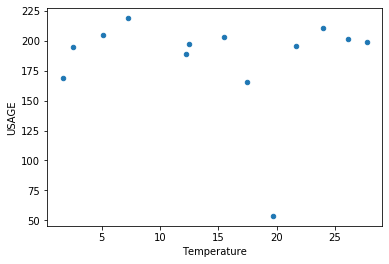

In [45]:
conedDataWithEnvDataByMonth.plot.scatter(x='Temperature', y='USAGE')

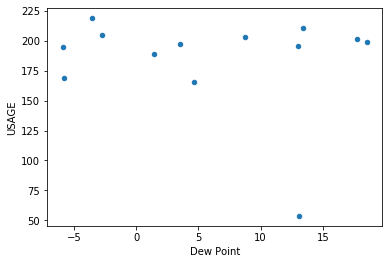

In [46]:
conedDataWithEnvDataByMonth.plot.scatter(x='Dew Point', y='USAGE')

In [47]:
# We can do better if we group by month as opposed to month and year. 
# We're essentially assuming that 5 days in May 2020 and May 2021 are similar to each other.

conedDataWithEnvDataByMonth = conedDataWithEnvData.groupby(by=['MONTH']).mean()

conedDataWithEnvDataByMonth['USAGE'] = conedDataWithEnvData.groupby(by=['MONTH']).sum()['USAGE']

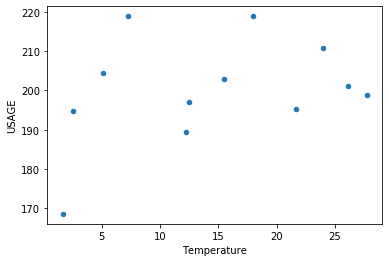

In [48]:
conedDataWithEnvDataByMonth.plot.scatter(x='Temperature', y='USAGE')

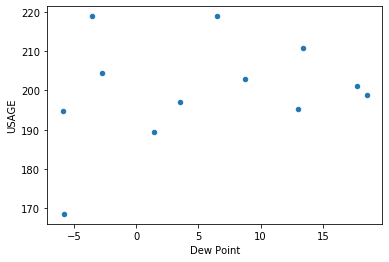

In [49]:
conedDataWithEnvDataByMonth.plot.scatter(x='Dew Point', y='USAGE')

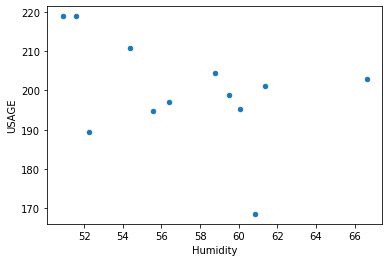

In [50]:
conedDataWithEnvDataByMonth.plot.scatter(x='Humidity', y='USAGE')

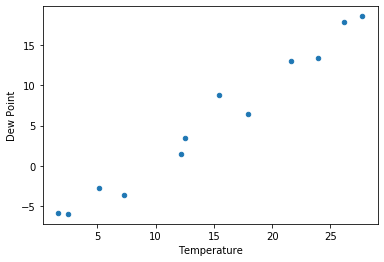

In [51]:
conedDataWithEnvDataByMonth.plot.scatter(x='Temperature', y='Dew Point')

In [52]:
# Grouping by day

conedDataWithEnvDataByDay = conedDataWithEnvData.groupby(by=['MONTH','DAY']).mean()

conedDataWithEnvDataByDay['USAGE'] = conedDataWithEnvData.groupby(by=['MONTH','DAY']).sum()['USAGE']

conedDataWithEnvDataByDay

USAGE  Temperature  Dew Point   Humidity  Wind Speed  Wind Gust  \
MONTH DAY                                                                    
1     1     7.81     3.260417  -2.809028  65.566667    8.070833   0.000000   
      2     7.15     6.705440   0.949074  68.538542   13.251042  10.604167   
      3     8.24     3.358796  -0.483796  76.496875   15.065625   1.317708   
      4     5.88     4.359375  -0.355903  71.831250    7.991667   0.000000   
      5     6.07     4.511574  -1.795139  64.069792    8.222917   0.000000   
...          ...          ...        ...        ...         ...        ...   
12    27    5.81     0.689815  -8.920139  49.768750    6.462500   0.750000   
      28    6.21     7.603588  -0.898148  55.729167    7.825000   0.612500   
      29    6.19     3.791667  -8.266204  41.870833   16.152083  11.554167   
      30    6.83     2.959491  -7.740741  46.464583    9.995833   3.266667   
      31    6.85     7.206019   0.571181  63.521875   10.806250   3.566667   

            Pressure   Precip.    YEAR  
MONTH DAY                               
1     1    30.359510  0.023021  2021.0  
      2    29.877927  0.001250  2021.0  
      3    30.014063  0.002604  2021.0  
      4    29.942865  0.000000  2021.0  
      5    29.899229  0.000000  2021.0  
...              ...       ...     ...  
12    27   30.244333  0.000000  2020.0  
      28   30.140688  0.000000  2020.0  
      29   30.350063  0.000000  2020.0  
      30   30.332771  0.000000  2020.0  
      31   30.125115  0.019479  2020.0  

[365 rows x 9 columns]

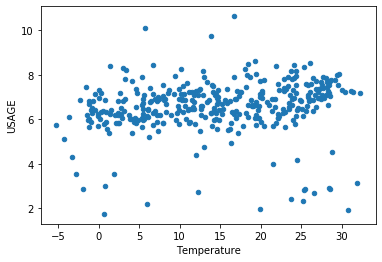

In [53]:
conedDataWithEnvDataByDay.plot.scatter(x='Temperature', y='USAGE')

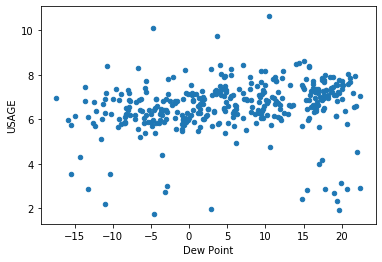

In [54]:
conedDataWithEnvDataByDay.plot.scatter(x='Dew Point', y='USAGE')

Text(0, 0.5, 'Usage (kWh)')

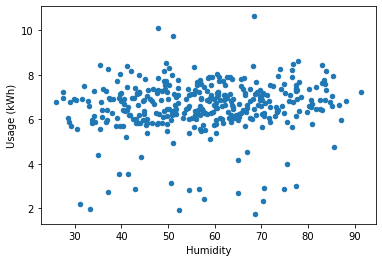

In [55]:
# Even better way of plotting. You can set the labels and so on once you get the axes object
ax1 = conedDataWithEnvDataByDay.plot.scatter(x='Humidity', y='USAGE')
ax1.set_xlabel('Humidity')
ax1.set_ylabel('Usage (kWh)')

Text(0, 0.5, 'Usage (kWh)')

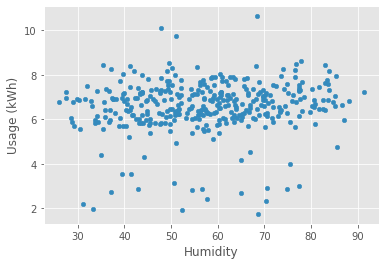

In [56]:
plt.style.use('ggplot') # Plot looks kind of better - if you think so.
ax1 = conedDataWithEnvDataByDay.plot.scatter(x='Humidity', y='USAGE')
ax1.set_xlabel('Humidity')
ax1.set_ylabel('Usage (kWh)')

In [57]:
print(plt.style.available)

['tableau-colorblind10', 'grayscale', 'seaborn-talk', 'Solarize_Light2', 'seaborn-pastel', 'seaborn-white', '_classic_test', 'seaborn-muted', 'seaborn-colorblind', 'seaborn-deep', 'ggplot', 'seaborn-notebook', 'seaborn-whitegrid', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-paper', 'fast', 'seaborn-bright', 'dark_background', 'seaborn-dark-palette', 'seaborn', 'seaborn-ticks', 'seaborn-dark', 'bmh', 'classic', 'seaborn-poster']


Text(0, 0.5, 'Usage (kWh)')

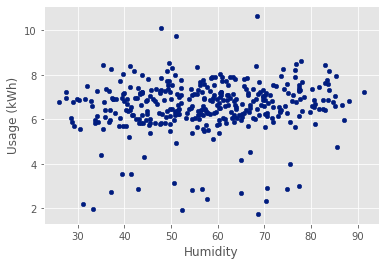

In [59]:
plt.style.use('seaborn-dark-palette') # Plot looks kind of better - if you think so.
ax1 = conedDataWithEnvDataByDay.plot.scatter(x='Humidity', y='USAGE')
ax1.set_xlabel('Humidity')
ax1.set_ylabel('Usage (kWh)')

### **Plotting histograms**

Text(0.5, 0, 'Usage (kWh, 15 minutes)')

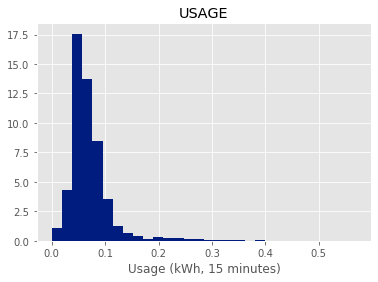

In [65]:
fig, ax1 = plt.subplots(1)
conedDataWithEnvData.hist('USAGE', density=True, bins=30, ax=ax1)
ax1.set_xlabel('Usage (kWh, 15 minutes)')

**Plotting histograms of images**

It is not uncommon to have to plot histograms of large data sets, especially images. Now-a-days, we have images with approximately 10 million pixels. Plotting the histogram of all 10 million pixels would be slow and, perhaps, useless. What you should do in such cases is to select a smaller number - say 1000 - at random. 

(array([4.81131966e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.29245163e-01, 4.33018770e-01,
        9.62263932e-02, 1.92452786e-01, 4.81131966e-02, 4.81131966e-02,
        2.40566673e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.88679180e-01, 4.81131966e-02, 9.62263932e-02, 2.40565983e-01,
        1.92452786e-01, 1.44339590e-01, 4.81131966e-02, 0.00000000e+00,
        4.81133346e-02, 1.92452786e-01, 1.44339590e-01, 3.36792376e-01,
        4.81131966e-02, 1.44339590e-01, 1.92452786e-01, 0.00000000e+00,
        1.92453338e-01, 1.92452235e-01, 1.92453338e-01, 1.44339176e-01,
        0.00000000e+00, 0.00000000e+00, 1.44340004e-01, 0.00000000e+00,
        9.62266692e-02, 2.40565293e-01, 9.62266692e-02, 1.44340004e-01,
        9.62261173e-02, 2.40566673e-01, 9.62261173e-02, 3.84906677e-01,
        0.00000000e+00, 1.92453338e-01, 4.81130586e-02, 0.00000000e+00,
        4.81130586e-02, 9.62266692e-02, 9.62261173e-02, 4.330200

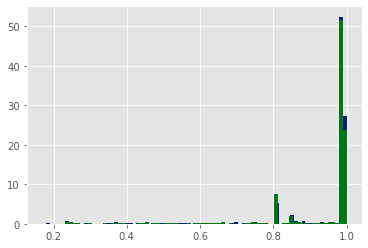

In [72]:
nsize1 = 1000
nsize2 = 2000

plt.hist(np.random.choice(spreadsheet.flatten(), size=nsize1), bins=80, density=True)

plt.hist(np.random.choice(spreadsheet.flatten(), size=nsize2), bins=80, density=True)

# The two histograms are almost identical - increasing the number of ransomly chosen samples will not change the
# shape of the histogram appreciably.

### **Describing a database**

dataframe.describe(), dataframe.info()

In [392]:
conedDataWithEnvData.describe()
# This is not very useful - average consumption every 15 minutes is not an useful metric
# but average daily consumption is.

,USAGE,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.,DAY,MONTH,YEAR
count,35080.000000,35079.000000,35079.000000,35079.000000,35079.000000,35079.000000,35079.000000,35079.000000,35080.000000,35080.000000,35080.000000
mean,0.068436,14.597282,5.476221,57.329378,10.476264,4.657131,30.009140,0.003407,15.725086,6.526112,2020.395325
std,0.043805,9.750609,10.301152,18.022905,5.470160,9.921151,0.221372,0.024082,8.800717,3.444519,0.488927
min,0.000000,-7.777778,-20.555556,12.400000,0.000000,0.000000,29.330000,0.000000,1.000000,1.000000,2020.000000
25%,0.040000,6.333333,-2.777778,43.600000,6.800000,0.000000,29.858000,0.000000,8.000000,4.000000,2020.000000
50%,0.060000,14.888889,5.666667,56.000000,9.600000,0.000000,29.998000,0.000000,16.000000,7.000000,2020.000000
75%,0.080000,23.000000,15.000000,72.000000,13.600000,0.000000,30.172000,0.000000,23.000000,10.000000,2021.000000
max,0.570000,36.111111,23.888889,97.000000,48.500000,66.750000,30.570000,0.880000,31.000000,12.000000,2021.000000


In [391]:
# Statistics about average daily consumption
conedDataWithEnvDataByDay.describe()

,USAGE,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,Precip.,YEAR
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,6.577397,14.589567,5.463115,57.309626,10.478932,4.664513,30.008706,0.003406,2020.395616
std,1.197181,9.467389,10.063147,14.579160,3.941926,6.932434,0.209029,0.008959,0.488980
min,1.760000,-5.255787,-17.395833,26.015741,3.083333,0.000000,29.416094,0.000000,2020.000000
25%,6.130000,6.398148,-2.957755,45.572917,7.634375,0.000000,29.870542,0.000000,2020.000000
50%,6.700000,14.618056,5.369213,57.208333,9.587500,1.541667,29.991833,0.000000,2020.000000
75%,7.230000,23.071181,15.335648,68.301042,12.490099,6.041667,30.148667,0.000000,2021.000000
max,10.630000,32.333333,22.461227,91.211458,25.732292,33.277083,30.496146,0.063854,2021.000000


In [395]:
conedDataWithEnvData.info() # Information about the data frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35080 entries, 0 to 35079
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TYPE         35080 non-null  object        
 1   CENTER TIME  35080 non-null  datetime64[ns]
 2   START TIME   35080 non-null  datetime64[ns]
 3   END TIME     35080 non-null  datetime64[ns]
 4   USAGE        35080 non-null  float64       
 5   UNITS        35080 non-null  object        
 6   NOTES        1 non-null      object        
 7   Temperature  35079 non-null  float64       
 8   Dew Point    35079 non-null  float64       
 9   Humidity     35079 non-null  float64       
 10  Wind         0 non-null      object        
 11  Wind Speed   35079 non-null  float64       
 12  Wind Gust    35079 non-null  float64       
 13  Pressure     35079 non-null  float64       
 14  Precip.      35079 non-null  float64       
 15  Condition    0 non-null      object        
 16  DAY 

## **Back to loops and conditionals**

In [410]:
listOfMonths = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May',
               6: 'June', 7:'July', 8:'August', 9:'September', 10:'October',
               11: 'November', 12:'December'}

for name, groups in conedDataWithEnvData.groupby(by=['MONTH']):
    groups.to_csv('conedDataWithEnvData'+'_'+listOfMonths[name]+'.csv', index=False)
    
# See for yourself - you would have created 12 separate csv files, one for each month!

Now that we have created 12 csv files, it is possible we want to work with them all. It is equally likely that you will encounter situations where you might have many images in a folder and you wish to analyze them one-by-one. In such situations, you can use glob to list all the files with a certain pattern.

In [411]:
import glob #glob is the library

for filename in glob.glob('conedDataWithEnvData_*.csv'):
    print(filename)

# Instead of print(filename), you can do anything else of interest

conedDataWithEnvData_June.csv
conedDataWithEnvData_November.csv
conedDataWithEnvData_October.csv
conedDataWithEnvData_January.csv
conedDataWithEnvData_August.csv
conedDataWithEnvData_March.csv
conedDataWithEnvData_July.csv
conedDataWithEnvData_December.csv
conedDataWithEnvData_May.csv
conedDataWithEnvData_September.csv
conedDataWithEnvData_April.csv
conedDataWithEnvData_February.csv


In [427]:
for filename in glob.glob('conedDataWithEnvData_*.csv'):
    month = filename.split('.')[0].split('_')[1]
    df = pd.read_csv(filename)
    
    print(month, ' - ', df['USAGE'].median(), ' - ', df['USAGE'].sum().round(2))

June  -  0.06  -  210.72
November  -  0.06  -  197.01
October  -  0.06  -  202.98
January  -  0.06  -  194.73
August  -  0.06  -  201.06
March  -  0.06  -  218.79
July  -  0.06  -  198.9
December  -  0.06  -  204.42
May  -  0.07  -  218.83
September  -  0.06  -  195.38
April  -  0.06  -  189.31
February  -  0.06  -  168.62


### **if-else, elif conditionals**

In [431]:
for filename in glob.glob('conedDataWithEnvData_*.csv'):
    month = filename.split('.')[0].split('_')[1]
    df = pd.read_csv(filename)
    
    if (df['USAGE'].sum() > 200.):
        print('Your energy consumption was high in the month of ', month)
    else:
        print('Your energy consumption was low in the month of ', month)
        
# Pretty trivial usage, but it illustrates the if else conditional quite well, dont you think?

Your energy consumption was high in the month of  June
Your energy consumption was low in the month of  November
Your energy consumption was high in the month of  October
Your energy consumption was low in the month of  January
Your energy consumption was high in the month of  August
Your energy consumption was high in the month of  March
Your energy consumption was low in the month of  July
Your energy consumption was high in the month of  December
Your energy consumption was high in the month of  May
Your energy consumption was low in the month of  September
Your energy consumption was low in the month of  April
Your energy consumption was low in the month of  February


In [435]:
for filename in glob.glob('conedDataWithEnvData_*.csv'):
    month = filename.split('.')[0].split('_')[1]
    df = pd.read_csv(filename)
    
    if (df['USAGE'].sum() > 210.):
        print('Your energy consumption was really high in the month of ', month,
              '(', round(df['USAGE'].sum(),2), ')')
    elif (200. < df['USAGE'].sum() < 210.):
        print('Your energy consumption was kinda high in the month of ', month,
              '(', round(df['USAGE'].sum(),2), ')')
    else:
        print('Your energy consumption was low in the month of ', month,
              '(', df['USAGE'].sum(), ')')

Your energy consumption was really high in the month of  June ( 210.72 )
Your energy consumption was low in the month of  November ( 197.01000000000002 )
Your energy consumption was kinda high in the month of  October ( 202.98 )
Your energy consumption was low in the month of  January ( 194.73000000000002 )
Your energy consumption was kinda high in the month of  August ( 201.06 )
Your energy consumption was really high in the month of  March ( 218.79 )
Your energy consumption was low in the month of  July ( 198.9 )
Your energy consumption was kinda high in the month of  December ( 204.42 )
Your energy consumption was really high in the month of  May ( 218.83 )
Your energy consumption was low in the month of  September ( 195.38000000000002 )
Your energy consumption was low in the month of  April ( 189.31 )
Your energy consumption was low in the month of  February ( 168.62 )


### **Loops with problems**

Sometimes, you might encounter loops in which you have problems for a particular value of the iterator. It usually does not happen with for loops iterating over integers. However, if you have a for loop over lists, it is possible you encouter problems. 

I encounter these problems when I have to download data from the web. In fact,I had to use this code while downloading data from wunderground. There are certain days for which wunderground does not have data - I do not know the reason behind it. If I let the code try to download the data for those days, it results in a timeout error. This is how I solved the problem

    for n in range(date_delta):
        date = str(dt.date())
        print (date)
    
        if date in ['2020-11-08','2020-11-19','2020-12-11','2020-12-21','2020-10-31','2021-05-21']:
            dt += timedelta(days=1)
            continue
    
        df = asyncio.get_event_loop().run_until_complete(table(url, date))
        
The **continue** statement is the key thing. You run the for loop until you encounter a problem day (I know these problem days before hand because I have encountered them with other stations). The if statement with continue essentially stops the rest of the code in the for loop from executing and goes on to the next iteration. We'll show it in action via a trivial example.

In [2]:
for n in np.arange(100):
    if n in [1, 4, 9, 16, 25, 36, 49, 64, 81]:
        continue
    print(n)

0
2
3
5
6
7
8
10
11
12
13
14
15
17
18
19
20
21
22
23
24
26
27
28
29
30
31
32
33
34
35
37
38
39
40
41
42
43
44
45
46
47
48
50
51
52
53
54
55
56
57
58
59
60
61
62
63
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
